In [1]:
import numpy as np
import pandas as pd

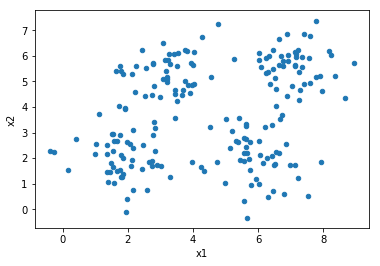

In [3]:
#加载样本
data=pd.read_csv('multiple3.txt',header=None,names=['x1','x2'])
data.plot.scatter(x='x1',y='x2')

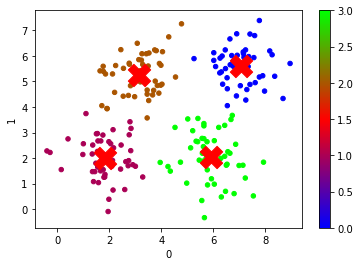

In [17]:
# 训练KMeans聚类模型  为每个样本找到归宿
import sklearn.cluster as sc
model=sc.KMeans(n_clusters=4)
model.fit(data)
label = model.labels_
ax=data.plot.scatter(x='x1',y='x2',c=label,cmap='brg')
#获取四个聚类中心
centers = model.cluster_centers_
centers = pd.DataFrame(centers)
centers.plot.scatter(x=0,y=1,c='red',marker='X',s=500,ax=ax)

## 输出轮廓系数

In [20]:
import sklearn.metrics as sm
score=sm.silhouette_score(data,label,sample_size=len(data),metric='euclidean')
score

0.5773232071896658

## DBSCAN聚类算法

0.5 : 0.5134143263329636
0.6 : 0.6165321688342581
0.7 : 0.6321600450689241
0.7999999999999999 : 0.6366395861050828
0.8999999999999999 : 0.514167895613453
0.9999999999999999 : 0.5629298661962946
1.0999999999999999 : 0.5629298661962946


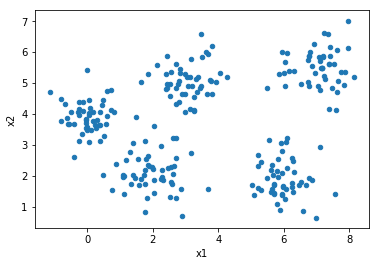

In [22]:
data=pd.read_csv('perf.txt',header=None,names=['x1','x2'])
data.plot.scatter(x='x1',y='x2')
#基于轮廓系数  选择最优半径
epss=np.arange(0.5,1.2,0.1)
for r in epss:
    model=sc.DBSCAN(eps=r,min_samples=5)
    model.fit(data)
    labels=model.labels_
    score = sm.silhouette_score(
            data,labels,sample_size=len(data),metric='euclidean')
    print(r,':',score)

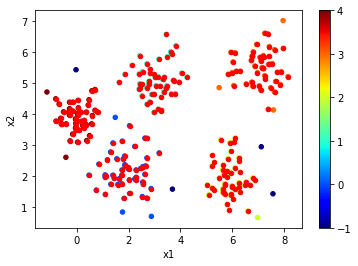

In [31]:
model = sc.DBSCAN(eps=0.8,min_samples=5)
model.fit(data)
labels=model.labels_
ax=data.plot.scatter(x='x1',y='x2',c=labels,cmap='jet')
#获取所有的核心样本
core_index=model.core_sample_indices_
data.loc[core_index].plot.scatter(x='x1',y='x2',c='red',s=20,ax=ax)